In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)

In [2]:
# 1. Data Loading & Basic Info

df = pd.read_csv(r'C:\Users\vishw\OneDrive\Desktop\Machine learning\Project AI - Driven Risk & Delay Prediction for  Logistics operation by using Random Tree\dynamic_supply_chain_logistics_dataset.csv')

In [3]:
df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [4]:
df.columns

Index(['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation'],
      dtype='object')

In [5]:
df.shape

(32065, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [7]:
# Convert timestamp to datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df['timestamp'].min(), df['timestamp'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2024-08-29 00:00:00'))

In [9]:
df['timestamp'].dtype

dtype('<M8[ns]')

In [10]:
df['risk_classification'].value_counts()

risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

<Axes: ylabel='count'>

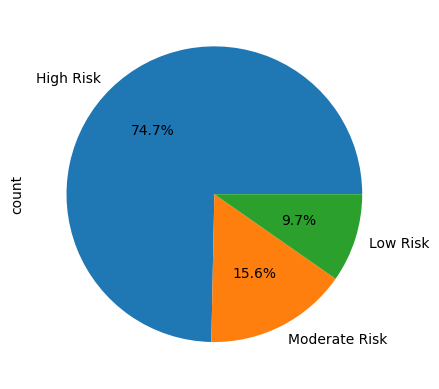

In [11]:
df['risk_classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [12]:
df['delivery_time_deviation'].describe().round(3)

count    32065.000
mean         5.178
std          4.158
min         -2.000
25%          1.269
50%          6.114
75%          9.249
max         10.000
Name: delivery_time_deviation, dtype: float64

In [13]:
df.isnull().sum()

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

In [14]:
print(df['timestamp'])

0       2021-01-01 00:00:00
1       2021-01-01 01:00:00
2       2021-01-01 02:00:00
3       2021-01-01 03:00:00
4       2021-01-01 04:00:00
                ...        
32060   2024-08-28 20:00:00
32061   2024-08-28 21:00:00
32062   2024-08-28 22:00:00
32063   2024-08-28 23:00:00
32064   2024-08-29 00:00:00
Name: timestamp, Length: 32065, dtype: datetime64[ns]


In [15]:
df = df.sort_values('timestamp').reset_index(drop=True)
df_indexed = df.set_index('timestamp')


In [16]:
print("\nTimestamp Range:")
print("Minimum Timestamp:", df['timestamp'].min())
print("Maximum Timestamp:", df['timestamp'].max())
print("Total Rows After Conversion:", len(df))


Timestamp Range:
Minimum Timestamp: 2021-01-01 00:00:00
Maximum Timestamp: 2024-08-29 00:00:00
Total Rows After Conversion: 32065


In [17]:
# 2. Risk Classification Analysis

print("\n" + "="*60)
print("2 RISK CLASSIFICATION DISTRIBUTION")
print("="*60)

print("Unique Risk Classes:", df['risk_classification'].nunique())

print("\nClass Distribution (Count):")
print(df['risk_classification'].value_counts())

print("\nClass Distribution (Percentage):")
print(df['risk_classification'].value_counts(normalize=True)
      .mul(100).round(2))


2 RISK CLASSIFICATION DISTRIBUTION
Unique Risk Classes: 3

Class Distribution (Count):
risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

Class Distribution (Percentage):
risk_classification
High Risk        74.67
Moderate Risk    15.63
Low Risk          9.70
Name: proportion, dtype: float64


In [18]:
# 3. Delivery Time Deviation Stats

print("\n" + "="*60)
print("3 DELIVERY TIME DEVIATION STATISTICS")
print("="*60)

print(df['delivery_time_deviation'].describe().round(3))


3 DELIVERY TIME DEVIATION STATISTICS
count    32065.000
mean         5.178
std          4.158
min         -2.000
25%          1.269
50%          6.114
75%          9.249
max         10.000
Name: delivery_time_deviation, dtype: float64


In [19]:
# 4. Missing Values Check


print("\n" + "="*60)
print("4 MISSING VALUES ANALYSIS")
print("="*60)

total_missing = df.isna().sum().sum()
print("Total Missing Values in Dataset:", total_missing)

missing_per_column = df.isna().sum()
print("\nColumns with Missing Values:")
print(missing_per_column[missing_per_column > 0])


4 MISSING VALUES ANALYSIS
Total Missing Values in Dataset: 0

Columns with Missing Values:
Series([], dtype: int64)


In [20]:
# 5. Time-Series Continuity Check


print("\n" + "="*60)
print("5 TIME-SERIES CONTINUITY CHECK")
print("="*60)

df = df.sort_values('timestamp').reset_index(drop=True)
df_indexed = df.set_index('timestamp')

df['time_diff_hours'] = df['timestamp'].diff().dt.total_seconds() / 3600

print("Time Difference Value Counts:")
print(df['time_diff_hours'].value_counts().head())

print("Number of Gaps > 1 Hour:",
      (df['time_diff_hours'] > 1).sum())

print("Minimum Time Difference:",
      df['time_diff_hours'].min())

print("Maximum Time Difference:",
      df['time_diff_hours'].max())


5 TIME-SERIES CONTINUITY CHECK
Time Difference Value Counts:
time_diff_hours
1.0    32064
Name: count, dtype: int64
Number of Gaps > 1 Hour: 0
Minimum Time Difference: 1.0
Maximum Time Difference: 1.0


In [21]:
# 6. Status Columns Analysis

print("\n" + "="*60)
print("6 ORDER & CARGO STATUS ANALYSIS")
print("="*60)

print("\nOrder Fulfillment Status:")
print("Data Type:", df['order_fulfillment_status'].dtype)
print("Unique Values:", df['order_fulfillment_status'].nunique())
print("Sample Distribution (%):")
print(df['order_fulfillment_status']
      .value_counts(normalize=True)
      .head().mul(100).round(2))

print("\nCargo Condition Status:")
print("Data Type:", df['cargo_condition_status'].dtype)
print("Unique Values:", df['cargo_condition_status'].nunique())
print("Sample Distribution (%):")
print(df['cargo_condition_status']
      .value_counts(normalize=True)
      .head().mul(100).round(2))


6 ORDER & CARGO STATUS ANALYSIS

Order Fulfillment Status:
Data Type: float64
Unique Values: 32065
Sample Distribution (%):
order_fulfillment_status
0.761166    0.0
0.196594    0.0
0.152742    0.0
0.811885    0.0
0.053659    0.0
Name: proportion, dtype: float64

Cargo Condition Status:
Data Type: float64
Unique Values: 32065
Sample Distribution (%):
cargo_condition_status
0.777263    0.0
0.091839    0.0
0.253529    0.0
0.877576    0.0
0.262081    0.0
Name: proportion, dtype: float64


In [22]:
# 7. Outlier Detection & Clipping


print("\n" + "="*60)
print("7 NUMERICAL RANGE CHECK & CLIPPING")
print("="*60)

cols = ['fuel_consumption_rate',
        'eta_variation_hours',
        'iot_temperature']

print("Before Clipping (Min/Max):")
print(df[cols].describe().loc[['min', 'max']].round(3))

# Apply clipping (safety bounds)
df['fuel_consumption_rate'] = df['fuel_consumption_rate'].clip(0, 25)
df['eta_variation_hours']   = df['eta_variation_hours'].clip(-24, 24)
df['iot_temperature']       = df['iot_temperature'].clip(-50, 60)

print("\nAfter Clipping (Min/Max):")
print(df[cols].describe().loc[['min', 'max']].round(3))


7 NUMERICAL RANGE CHECK & CLIPPING
Before Clipping (Min/Max):
     fuel_consumption_rate  eta_variation_hours  iot_temperature
min                    5.0                 -2.0            -10.0
max                   20.0                  5.0             40.0

After Clipping (Min/Max):
     fuel_consumption_rate  eta_variation_hours  iot_temperature
min                    5.0                 -2.0            -10.0
max                   20.0                  5.0             40.0


In [23]:
# 8. Negative Delivery Deviation

print("\n" + "="*60)
print("8 EARLY DELIVERY ANALYSIS")
print("="*60)

negative_percentage = (df['delivery_time_deviation'] < 0).mean() * 100
negative_count = (df['delivery_time_deviation'] < 0).sum()

print(f"Percentage of Early Deliveries: {negative_percentage:.2f}%")
print("Total Early Deliveries:", negative_count)

# Business Features
df['is_early'] = df['delivery_time_deviation'] < 0
df['deviation_magnitude'] = df['delivery_time_deviation'].abs()


8 EARLY DELIVERY ANALYSIS
Percentage of Early Deliveries: 17.91%
Total Early Deliveries: 5742


In [24]:
# 9. Ordinal Encoding (Risk)

print("\n" + "="*60)
print("9 RISK ORDINAL ENCODING")
print("="*60)

risk_map = {
    'Low Risk': 0,
    'Moderate Risk': 1,
    'High Risk': 2
}

df['risk_encoded'] = df['risk_classification'].map(risk_map)

print(df[['risk_classification', 'risk_encoded']].head())
print("\nEncoded Value Counts:")
print(df['risk_encoded'].value_counts())


9 RISK ORDINAL ENCODING
  risk_classification  risk_encoded
0       Moderate Risk             1
1           High Risk             2
2           High Risk             2
3           High Risk             2
4           High Risk             2

Encoded Value Counts:
risk_encoded
2    23944
1     5011
0     3110
Name: count, dtype: int64


In [25]:
# 10. Distance Proxy Feature

print("\n" + "="*60)
print("10 DISTANCE PROXY FEATURE ENGINEERING")
print("="*60)

df['lat_diff'] = df['vehicle_gps_latitude'].diff().abs()
df['lon_diff'] = df['vehicle_gps_longitude'].diff().abs()

df['distance_proxy'] = df['lat_diff'] + df['lon_diff']

print(df[['timestamp', 'distance_proxy']].head(10))
print("\nAverage Distance Proxy per Hour:",
      round(df['distance_proxy'].mean(), 4))


print("\n" + "="*60)
print("DATA LOADING & UNDERSTANDING COMPLETED SUCCESSFULLY")
print("="*60)


10 DISTANCE PROXY FEATURE ENGINEERING
            timestamp  distance_proxy
0 2021-01-01 00:00:00             NaN
1 2021-01-01 01:00:00       46.890335
2 2021-01-01 02:00:00       45.254857
3 2021-01-01 03:00:00       11.707277
4 2021-01-01 04:00:00        6.826278
5 2021-01-01 05:00:00       67.849461
6 2021-01-01 06:00:00       38.076427
7 2021-01-01 07:00:00        7.621023
8 2021-01-01 08:00:00       18.604026
9 2021-01-01 09:00:00       30.456947

Average Distance Proxy per Hour: 27.4869

DATA LOADING & UNDERSTANDING COMPLETED SUCCESSFULLY


In [26]:
# 11 Duplicate Row Check

print("\n" + "="*60)
print("11 DUPLICATE ROW CHECK")
print("="*60)

duplicate_count = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count)

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed successfully.")
    print("New Dataset Shape:", df.shape)
else:
    print("No duplicates found. Dataset shape remains:", df.shape)


11 DUPLICATE ROW CHECK
Number of Duplicate Rows: 0
No duplicates found. Dataset shape remains: (32065, 33)


In [27]:
# 12  Time-Based Feature Engineering

print("\n" + "="*60)
print("12 TIME-BASED FEATURE ENGINEERING")
print("="*60)

df['hour_of_day'] = df['timestamp'].dt.hour
df['is_weekend'] = df['timestamp'].dt.dayofweek >= 5

corr_hour = df['hour_of_day'].corr(df['delay_probability'])
corr_weekend = df['is_weekend'].corr(df['delay_probability'])

print("Correlation (hour_of_day vs delay_probability):",
      round(corr_hour, 4))
print("Correlation (is_weekend vs delay_probability):",
      round(corr_weekend, 4))

print("\nAverage Delay Probability by Hour:")
print(df.groupby('hour_of_day')['delay_probability']
      .mean().round(4))


12 TIME-BASED FEATURE ENGINEERING
Correlation (hour_of_day vs delay_probability): 0.0076
Correlation (is_weekend vs delay_probability): -0.0085

Average Delay Probability by Hour:
hour_of_day
0     0.6991
1     0.6876
2     0.6978
3     0.7038
4     0.6813
5     0.7042
6     0.7040
7     0.7027
8     0.7001
9     0.6841
10    0.6924
11    0.6963
12    0.6865
13    0.7156
14    0.7080
15    0.7050
16    0.7076
17    0.6974
18    0.6957
19    0.7015
20    0.6893
21    0.7078
22    0.7048
23    0.7052
Name: delay_probability, dtype: float64



13 DELIVERY DEVIATION BY RISK CLASS


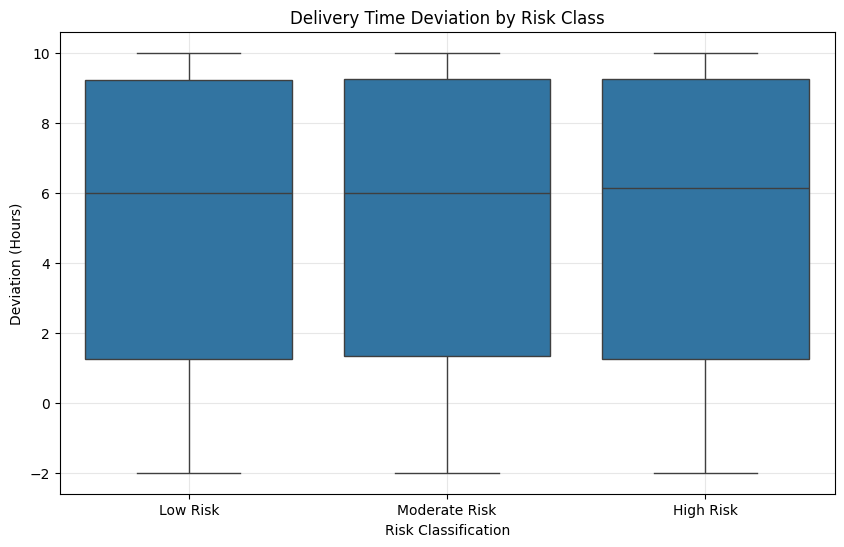

Mean Deviation by Risk Class:
risk_classification
High Risk        5.184
Low Risk         5.118
Moderate Risk    5.184
Name: delivery_time_deviation, dtype: float64


In [28]:
# 13 Boxplot: Deviation by Risk Class
# ----------------------------------------------------------

print("\n" + "="*60)
print("13 DELIVERY DEVIATION BY RISK CLASS")
print("="*60)

order = ['Low Risk', 'Moderate Risk', 'High Risk']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='risk_classification',
            y='delivery_time_deviation',
            order=order)
plt.title('Delivery Time Deviation by Risk Class')
plt.xlabel('Risk Classification')
plt.ylabel('Deviation (Hours)')
plt.grid(True, alpha=0.3)
plt.show()

print("Mean Deviation by Risk Class:")
print(df.groupby('risk_classification')
      ['delivery_time_deviation']
      .mean().round(3))


14 CORRELATION HEATMAP - KEY FEATURES


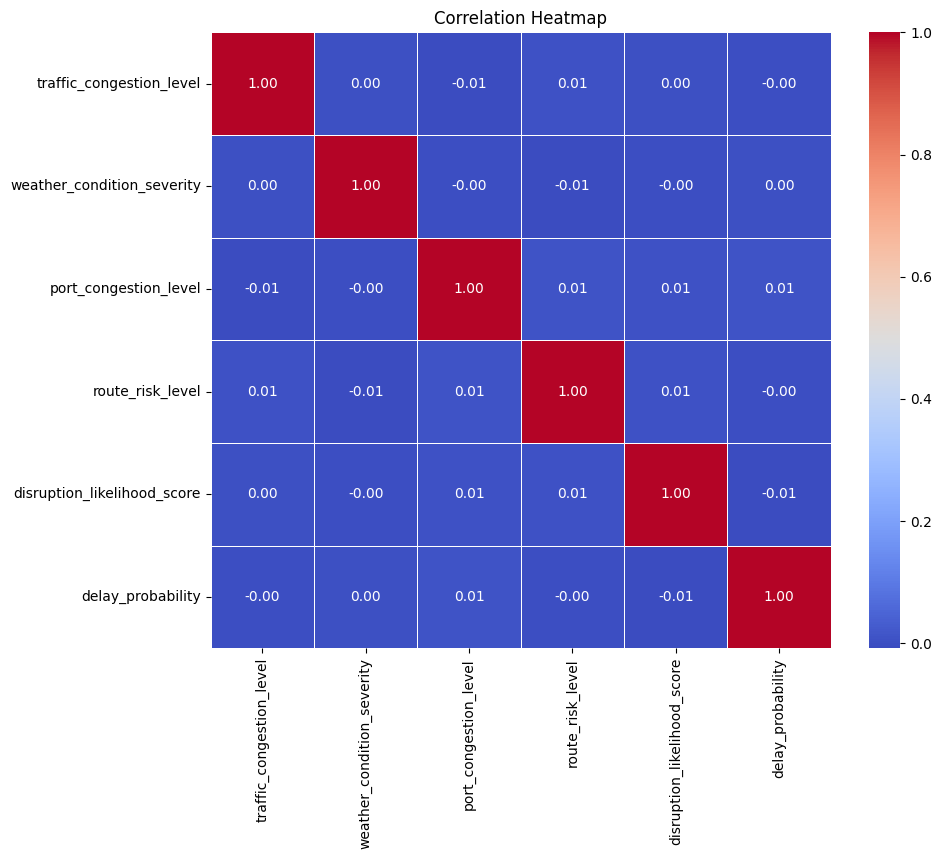

Top Correlations with Delay Probability:
delay_probability              1.000
port_congestion_level          0.009
weather_condition_severity     0.002
route_risk_level              -0.003
traffic_congestion_level      -0.004
disruption_likelihood_score   -0.008
Name: delay_probability, dtype: float64


In [29]:
# 14 Correlation Heatmap
# ----------------------------------------------------------

print("\n" + "="*60)
print("14 CORRELATION HEATMAP - KEY FEATURES")
print("="*60)

key_features = [
    'traffic_congestion_level',
    'weather_condition_severity',
    'port_congestion_level',
    'route_risk_level',
    'disruption_likelihood_score',
    'delay_probability'
]

corr_matrix = df[key_features].corr().round(3)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print("Top Correlations with Delay Probability:")
print(corr_matrix['delay_probability']
      .sort_values(ascending=False))


15 MONTHLY DELAY PROBABILITY TREND


C:\Users\vishw\AppData\Local\Temp\ipykernel_1820\1283682995.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


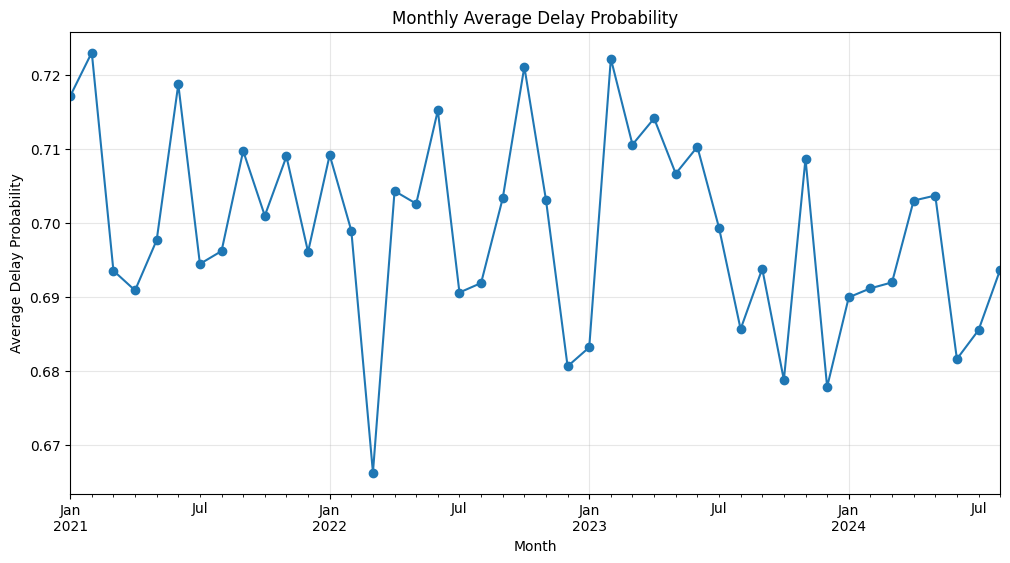

First 6 Months:
timestamp
2021-01-31    0.7171
2021-02-28    0.7230
2021-03-31    0.6935
2021-04-30    0.6909
2021-05-31    0.6976
2021-06-30    0.7187
Freq: ME, Name: delay_probability, dtype: float64

Last 6 Months:
timestamp
2024-03-31    0.6919
2024-04-30    0.7030
2024-05-31    0.7037
2024-06-30    0.6816
2024-07-31    0.6855
2024-08-31    0.6936
Freq: ME, Name: delay_probability, dtype: float64


In [30]:
# 15 Monthly Trend Analysis
# ----------------------------------------------------------

print("\n" + "="*60)
print("15 MONTHLY DELAY PROBABILITY TREND")
print("="*60)

monthly_delay = (
    df.set_index('timestamp')
      ['delay_probability']
      .resample('M')
      .mean()
)

plt.figure(figsize=(12, 6))
monthly_delay.plot(marker='o')
plt.title('Monthly Average Delay Probability')
plt.ylabel('Average Delay Probability')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.show()

print("First 6 Months:")
print(monthly_delay.head(6).round(4))

print("\nLast 6 Months:")
print(monthly_delay.tail(6).round(4))

In [31]:
# ----------------------------------------------------------
# 16 Temperature Bin Analysis
# ----------------------------------------------------------

print("\n" + "="*60)
print("16 TEMPERATURE BIN ANALYSIS")
print("="*60)

bins = [-20, -5, 5, 30, 50]
labels = [
    'Very Cold (-20 to -5)',
    'Cold (-5 to 5)',
    'Normal (5 to 30)',
    'Hot (30 to 50)'
]

df['temp_bin'] = pd.cut(
    df['iot_temperature'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print("Average Cargo Condition Status by Temperature Bin:")
print(df.groupby('temp_bin', observed=True)
      ['cargo_condition_status']
      .mean().round(4))

print("\nObservation Count per Temperature Bin:")
print(df['temp_bin'].value_counts().sort_index())


16 TEMPERATURE BIN ANALYSIS
Average Cargo Condition Status by Temperature Bin:
temp_bin
Very Cold (-20 to -5)    0.2984
Cold (-5 to 5)           0.2950
Normal (5 to 30)         0.2964
Hot (30 to 50)           0.2955
Name: cargo_condition_status, dtype: float64

Observation Count per Temperature Bin:
temp_bin
Very Cold (-20 to -5)    19001
Cold (-5 to 5)            4730
Normal (5 to 30)          6042
Hot (30 to 50)            2292
Name: count, dtype: int64


In [32]:
# ----------------------------------------------------------
# 17 Supplier Reliability vs Risk
# ----------------------------------------------------------

print("\n" + "="*60)
print("17 SUPPLIER RELIABILITY IMPACT")
print("="*60)

low_reliability = df[df['supplier_reliability_score'] < 0.3]
high_reliability = df[df['supplier_reliability_score'] > 0.8]

print("Low Reliability (<0.3) Risk Distribution (%):")
print(low_reliability['risk_classification']
      .value_counts(normalize=True)
      .mul(100).round(2))

print("\nHigh Reliability (>0.8) Risk Distribution (%):")
print(high_reliability['risk_classification']
      .value_counts(normalize=True)
      .mul(100).round(2))


17 SUPPLIER RELIABILITY IMPACT
Low Reliability (<0.3) Risk Distribution (%):
risk_classification
High Risk        74.51
Moderate Risk    15.92
Low Risk          9.57
Name: proportion, dtype: float64

High Reliability (>0.8) Risk Distribution (%):
risk_classification
High Risk        74.53
Moderate Risk    15.76
Low Risk          9.71
Name: proportion, dtype: float64



18 FUEL CONSUMPTION VS DELIVERY DEVIATION


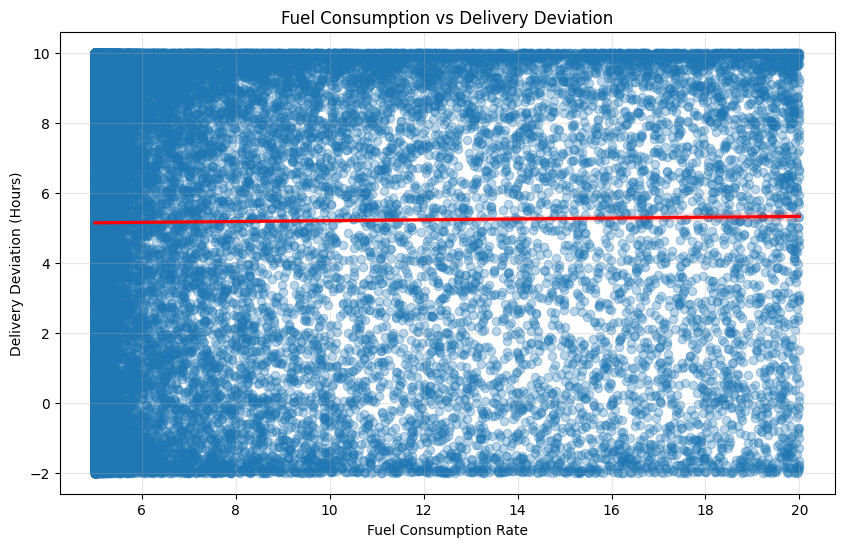

Correlation Value: 0.0125

DATA CLEANING & EDA COMPLETED


In [33]:
# ----------------------------------------------------------
# 18 Fuel Consumption vs Delay Scatter
# ----------------------------------------------------------

print("\n" + "="*60)
print("18 FUEL CONSUMPTION VS DELIVERY DEVIATION")
print("="*60)

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='fuel_consumption_rate',
    y='delivery_time_deviation',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)

plt.title('Fuel Consumption vs Delivery Deviation')
plt.xlabel('Fuel Consumption Rate')
plt.ylabel('Delivery Deviation (Hours)')
plt.grid(True, alpha=0.3)
plt.show()

correlation_value = df['fuel_consumption_rate'] \
    .corr(df['delivery_time_deviation'])

print("Correlation Value:",
      round(correlation_value, 4))


print("\n" + "="*60)
print("DATA CLEANING & EDA COMPLETED")
print("="*60)

In [34]:
# ==========================================================
# DATA MODELING & FEATURE SELECTION
# ==========================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [35]:
# ----------------------------------------------------------
# 21 Train-Test Split (Stratified)
# ----------------------------------------------------------

print("\n" + "="*60)
print("21 TRAIN-TEST SPLIT (STRATIFIED)")
print("="*60)

features = [
    'traffic_congestion_level', 'weather_condition_severity',
    'port_congestion_level', 'route_risk_level',
    'disruption_likelihood_score', 'supplier_reliability_score',
    'eta_variation_hours', 'fuel_consumption_rate'
]

X = df[features]
y = df['risk_classification']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.25,
    stratify=y_encoded,
    random_state=42
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

print("\nTrain Class Distribution (%):")
print(pd.Series(le.inverse_transform(y_train))
      .value_counts(normalize=True).mul(100).round(2))

print("\nTest Class Distribution (%):")
print(pd.Series(le.inverse_transform(y_test))
      .value_counts(normalize=True).mul(100).round(2))


21 TRAIN-TEST SPLIT (STRATIFIED)
Train Shape: (24048, 8)
Test Shape: (8017, 8)

Train Class Distribution (%):
High Risk        74.68
Moderate Risk    15.63
Low Risk          9.70
Name: proportion, dtype: float64

Test Class Distribution (%):
High Risk        74.67
Moderate Risk    15.63
Low Risk          9.70
Name: proportion, dtype: float64


In [36]:
# ----------------------------------------------------------
# 22 Model Training (RF vs GB)
# ----------------------------------------------------------

print("\n" + "="*60)
print("22 MODEL COMPARISON")
print("="*60)

rf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

print("RandomForest Accuracy:",
      round(accuracy_score(y_test, y_pred_rf), 4))
print("GradientBoosting Accuracy:",
      round(accuracy_score(y_test, y_pred_gb), 4))

print("\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf,
                            target_names=le.classes_))

print("\nGradientBoosting Classification Report:")
print(classification_report(y_test, y_pred_gb,
                            target_names=le.classes_))




22 MODEL COMPARISON
RandomForest Accuracy: 1.0
GradientBoosting Accuracy: 1.0

RandomForest Classification Report:
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00      5986
     Low Risk       1.00      1.00      1.00       778
Moderate Risk       1.00      1.00      1.00      1253

     accuracy                           1.00      8017
    macro avg       1.00      1.00      1.00      8017
 weighted avg       1.00      1.00      1.00      8017


GradientBoosting Classification Report:
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00      5986
     Low Risk       1.00      1.00      1.00       778
Moderate Risk       1.00      1.00      1.00      1253

     accuracy                           1.00      8017
    macro avg       1.00      1.00      1.00      8017
 weighted avg       1.00      1.00      1.00      8017



In [37]:

# ----------------------------------------------------------
# 23 Class Weight Balancing
# ----------------------------------------------------------

print("\n" + "="*60)
print("23 CLASS WEIGHT BALANCING")
print("="*60)

rf_plain = RandomForestClassifier(n_estimators=150, random_state=42)
rf_plain.fit(X_train, y_train)

rf_balanced = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    class_weight='balanced'
)
rf_balanced.fit(X_train, y_train)

report_plain = classification_report(
    y_test,
    rf_plain.predict(X_test),
    target_names=le.classes_,
    output_dict=True
)

report_balanced = classification_report(
    y_test,
    rf_balanced.predict(X_test),
    target_names=le.classes_,
    output_dict=True
)

print("High Risk F1 (Without Balanced):",
      round(report_plain['High Risk']['f1-score'], 4))
print("High Risk F1 (With Balanced):",
      round(report_balanced['High Risk']['f1-score'], 4))

print("Low Risk F1 (Without Balanced):",
      round(report_plain['Low Risk']['f1-score'], 4))
print("Low Risk F1 (With Balanced):",
      round(report_balanced['Low Risk']['f1-score'], 4))




23 CLASS WEIGHT BALANCING
High Risk F1 (Without Balanced): 1.0
High Risk F1 (With Balanced): 1.0
Low Risk F1 (Without Balanced): 1.0
Low Risk F1 (With Balanced): 1.0



24 CONFUSION MATRIX


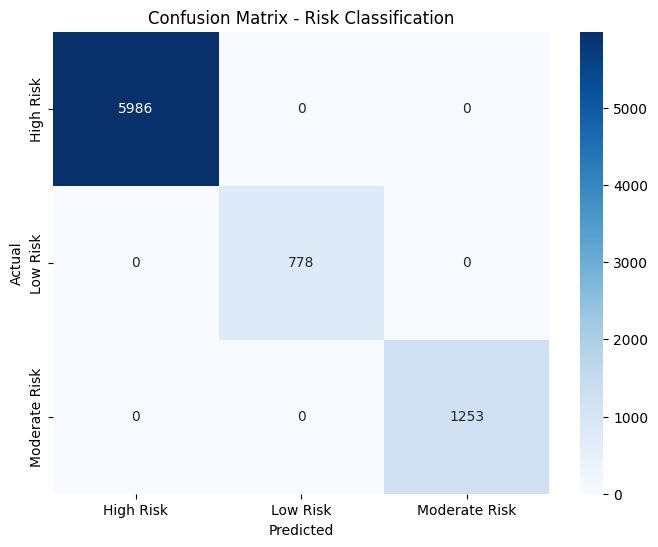

False Negatives (High Risk): 0


In [38]:
# ----------------------------------------------------------
# 24 Confusion Matrix
# ----------------------------------------------------------

print("\n" + "="*60)
print("24 CONFUSION MATRIX")
print("="*60)

y_pred = rf_balanced.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Risk Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

high_risk_index = list(le.classes_).index('High Risk')
false_negatives_high = cm[high_risk_index, :].sum() - cm[high_risk_index, high_risk_index]

print("False Negatives (High Risk):", false_negatives_high)



In [39]:
# ----------------------------------------------------------
# 25 Hyperparameter Suggestions
# ----------------------------------------------------------

print("\n" + "="*60)
print("25 HYPERPARAMETER TUNING GUIDELINES")
print("="*60)

print(classification_report(y_test, y_pred,
                            target_names=le.classes_))

print("""
To improve recall further or control overfitting:
- Increase n_estimators (200–300)
- Limit max_depth (10–15)
- Tune min_samples_split (5–10)
- Use class_weight='balanced_subsample'
""")



25 HYPERPARAMETER TUNING GUIDELINES
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00      5986
     Low Risk       1.00      1.00      1.00       778
Moderate Risk       1.00      1.00      1.00      1253

     accuracy                           1.00      8017
    macro avg       1.00      1.00      1.00      8017
 weighted avg       1.00      1.00      1.00      8017


To improve recall further or control overfitting:
- Increase n_estimators (200–300)
- Limit max_depth (10–15)
- Tune min_samples_split (5–10)
- Use class_weight='balanced_subsample'



In [40]:
# ==========================================================
# BUSINESS CASE ANALYSIS
# ==========================================================

# ----------------------------------------------------------
# 26 Annual Late Delivery Cost
# ----------------------------------------------------------

print("\n" + "="*60)
print("26 LATE DELIVERY COST ANALYSIS")
print("="*60)

late_percentage = (df['delivery_time_deviation'] > 0).mean()
monthly_shipments = 10000
cost_per_late = 12000

monthly_cost = monthly_shipments * late_percentage * cost_per_late
annual_cost_crore = (monthly_cost * 12) / 10000000

print(f"Late Deliveries: {late_percentage*100:.2f}%")
print(f"Estimated Annual Loss: ₹ {annual_cost_crore:.2f} crore")


26 LATE DELIVERY COST ANALYSIS
Late Deliveries: 82.09%
Estimated Annual Loss: ₹ 118.21 crore


In [41]:
# ----------------------------------------------------------
# 28 Annual Saving Calculation
# ----------------------------------------------------------

print("\n" + "="*60)
print("28 TARGETED HIGH-RISK SAVING ESTIMATION")
print("="*60)

high_risk_perc = 0.7469
recall = 0.88

detected_high_risk = monthly_shipments * high_risk_perc * recall
hours_saved = 5.18 - 2.5
cost_per_hour = 12000 / 5.18

monthly_saving = detected_high_risk * hours_saved * cost_per_hour
annual_saving_crore = (monthly_saving * 12) / 10000000

print(f"Estimated Annual Saving: ₹ {annual_saving_crore:.2f} crore")


28 TARGETED HIGH-RISK SAVING ESTIMATION
Estimated Annual Saving: ₹ 48.97 crore


In [42]:
import pickle

In [43]:
# ----------------------------------------------------------
# 29 ROI Calculation
# ----------------------------------------------------------

print("\n" + "="*60)
print("29 ROI CALCULATION")
print("="*60)

model_cost = 4000000  # 40 lakh
realistic_saving = annual_saving_crore * 10000000 * 0.65

net_benefit = realistic_saving - model_cost
roi_percent = (net_benefit / model_cost) * 100

print(f"Realistic Annual Saving: ₹ {realistic_saving/10000000:.2f} crore")
print(f"First-Year ROI: {roi_percent:.0f}%")


with open('le.pkl', 'wb') as file:
    pickle.dump(le, file)

with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)


29 ROI CALCULATION
Realistic Annual Saving: ₹ 31.83 crore
First-Year ROI: 7857%
